In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [11]:
housesale_df = pd.read_csv('dataset/kc_house_data.csv')

housesale_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [12]:
housesale_df.shape

(21613, 21)

In [13]:
housesale_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [14]:
housesale_df = housesale_df.drop(['id', 'date', 'zipcode'], axis =1)

In [15]:
housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [16]:
housesale_df.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [17]:
housesale_df['age'] = 2021 - housesale_df['yr_built']

housesale_df = housesale_df.drop('yr_built', axis = 1)

housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,0,47.5112,-122.257,1340,5650,66
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1991,47.7210,-122.319,1690,7639,70
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,0,47.7379,-122.233,2720,8062,88
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,56
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,0,47.6168,-122.045,1800,7503,34


In [18]:
housesale_df['renovated'] = housesale_df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)

housesale_df = housesale_df.drop('yr_renovated', axis = 1)

housesale_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650,66,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639,70,1
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062,88,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000,56,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503,34,0


In [19]:
housesale_df.to_csv('dataset/kc_house_data_preprocessed.csv', index = False)

In [20]:
housesale_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652,49.994864,0.042289
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631,29.373411,0.201253
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,6.000000,0.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000,24.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000,46.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000,70.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000,121.000000,1.000000


Text(0, 0.5, 'Number of bathroom')

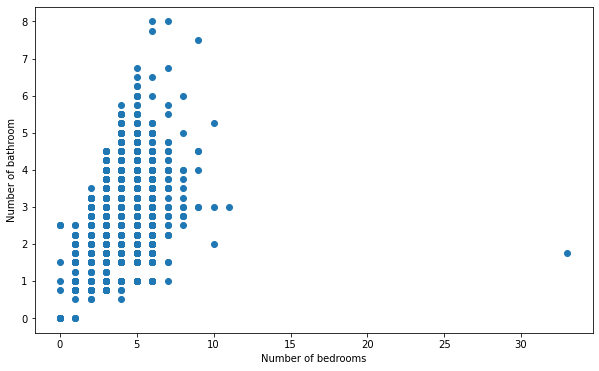

In [22]:
fig,  ax = plt.subplots(figsize =(10, 6))

plt.scatter(housesale_df['bedrooms'], housesale_df['bathrooms'])

plt.xlabel('Number of bedrooms')
plt.ylabel('Number of bathroom')

Text(0, 0.5, 'price')

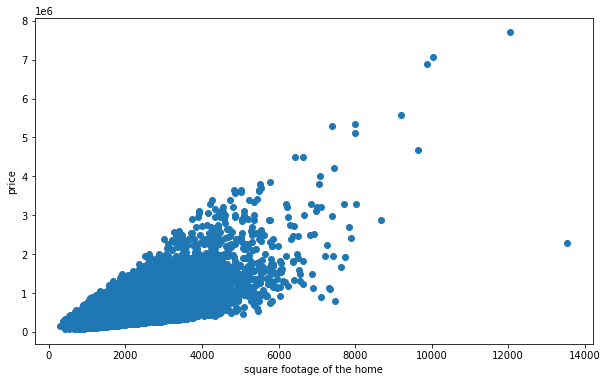

In [23]:
fig,  ax = plt.subplots(figsize =(10, 6))

plt.scatter(housesale_df['sqft_living'], housesale_df['price'])

plt.xlabel('square footage of the home')
plt.ylabel('price')

Text(0, 0.5, 'price')

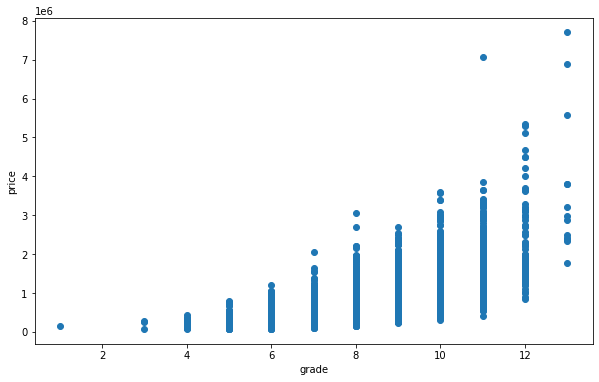

In [24]:
fig,  ax = plt.subplots(figsize =(10, 6))

plt.scatter(housesale_df['grade'], housesale_df['price'])

plt.xlabel('grade')
plt.ylabel('price')

In [25]:
housesale_df_corr = housesale_df.corr()

housesale_df_corr

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,age,renovated
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.307003,0.021626,0.585379,0.082447,-0.054012,0.126092
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.008931,0.129473,0.391638,0.029244,-0.154178,0.018553
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.024573,0.223042,0.568634,0.087175,-0.506019,0.050260
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.052529,0.240223,0.756420,0.183286,-0.318049,0.055094
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.085683,0.229521,0.144608,0.718557,-0.053080,0.007745
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.049614,0.125419,0.279885,-0.011269,-0.489319,0.006260
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.014274,-0.041910,0.086463,0.030703,0.026161,0.093294
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.006157,-0.078400,0.280439,0.072575,0.053440,0.104062
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.014941,-0.106500,-0.092824,-0.003406,0.361417,-0.060139
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.114084,0.198372,0.713202,0.119248,-0.446963,0.014008


<AxesSubplot:>

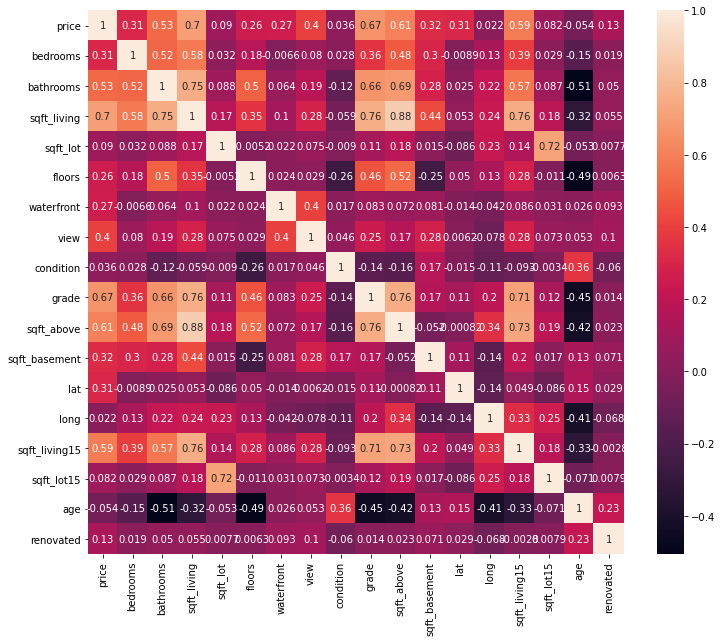

In [28]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(housesale_df_corr, annot = True)

In [30]:
x = housesale_df.drop('price', axis = 1)
y = housesale_df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [32]:
reg_model = LinearRegression().fit(x_train, y_train)

In [33]:
print('Training score: ', reg_model.score(x_train, y_train))

Training score:  0.6970373806562


In [34]:
predictors = x_train.columns
coef = pd.Series(reg_model.coef_, predictors).sort_values()
print(coef)

long            -119205.785307
bedrooms         -34415.636445
floors            -2146.815968
sqft_lot15           -0.405790
sqft_lot              0.117825
sqft_living15        28.644476
sqft_basement        37.064713
sqft_above           72.312278
sqft_living         109.376992
age                2469.721465
condition         30769.216009
bathrooms         44909.774740
renovated         45689.810844
view              51104.788661
grade             97404.306969
lat              563039.824323
waterfront       615159.154806
dtype: float64


In [35]:
y_pred = reg_model.predict(x_test)

In [37]:
print('Test score: ',r2_score(y_test, y_pred))

Test score:  0.685881179274789


In [40]:
import statsmodels.api as sm

x_train_with_const = sm.add_constant(x_train)

model = sm.OLS(y_train, x_train_with_const)

In [41]:
 result = model.fit()

In [42]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2484.
Date:                Sat, 30 Jan 2021   Prob (F-statistic):               0.00
Time:                        02:08:23   Log-Likelihood:            -2.3608e+05
No. Observations:               17290   AIC:                         4.722e+05
Df Residuals:                   17273   BIC:                         4.723e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -4.22e+07   1.74e+06    -24.223